# WCsim Env

## 1. Import the module

In [1]:
from wcscore import WCsimEnvCore
import numpy as np
import random

np.random.seed(0) # Initialize Random Seed

## 2. Initialize modules

In [2]:
env = WCsimEnvCore(server_ip='127.0.0.1', server_port=8877)

Server: Hello Client~ 
Connected to Server successfully.
The Simulator is ready.


## 3. Actions Testing

#### 3.1 Reset Command
Remove every devices from the environment

In [3]:
env.reset()

#### 3.2 Add a base station

In [4]:
env.add_station([0, 7, 0], [0,0,0], 2.4e9)

#### 3.3 Ask the list of base stations

In [5]:
station_list = env.ask_stations_info()
print('list of station IDs:' + str(station_list))

list of station IDs:[1]


#### 3.4 Add a user

In [6]:
env.add_user(list(np.random.random(3)*10)) # np.random does random position of users

#### 3.5 Ask the list of users

In [7]:
user_list = env.ask_users_info()
print('list of user IDs:' + str(user_list))

list of user IDs:[1]


#### 3.6 Get a station information

In [8]:
station_id = station_list[0]
station_info = env.ask_station_info(station_id)
print('A Station\'s Information: \n' + str(station_info))

A Station's Information: 
{'id': 1, 'position': [0.0, 7.0, 0.0], 'rotation': [0.0, 0.0, 0.0], 'frequency': 2400000000.0, 'users': [], 'average path loss': None}


#### 3.7 Get a user infomation

In [9]:
user_id = user_list[0]
user_info = env.ask_user_info(user_id)
print('A user\'s information\n' + str(user_info))

A user's information
{'id': 1, 'position': [5.488135, 7.151894, 6.027634], 'station': None, 'path loss': None}


#### 3.8 Conenct the user to the station

In [10]:
env.connect_user_to_station(station_id, user_id)
station_info = env.ask_station_info(station_id) # Update information
user_info = env.ask_user_info(user_id)
print('An Updated Station\'s Information: \n' + str(station_info))
print('An Updated User\'s Information\n' + str(user_info))

An Updated Station's Information: 
{'id': 1, 'position': [0.0, 7.0, 0.0], 'rotation': [0.0, 0.0, 0.0], 'frequency': 2400000000.0, 'users': [1], 'average path loss': -58.102524}
An Updated User's Information
{'id': 1, 'position': [5.488135, 7.151894, 6.027634], 'station': 1, 'path loss': -58.102524}


Now we can see in the information that the station has a user connected as well as a user connect to a station

#### 3.9 Disconnect the user from the station

In [11]:
env.disconnect_user_from_station(station_id, user_id)
station_info = env.ask_station_info(station_id) # Update information.
user_info = env.ask_user_info(user_id)
print('An Updated Station\'s Information: \n' + str(station_info))
print('An Updated User\'s Information\n' + str(user_info))

An Updated Station's Information: 
{'id': 1, 'position': [0.0, 7.0, 0.0], 'rotation': [0.0, 0.0, 0.0], 'frequency': 2400000000.0, 'users': [], 'average path loss': None}
An Updated User's Information
{'id': 1, 'position': [5.488135, 7.151894, 6.027634], 'station': None, 'path loss': None}


From both information, the user disconnected from the station successfully.

#### 3.10 Remove A User While Connecting the Station

In [12]:
env.connect_user_to_station(station_id, user_id) #Reconnect the user to the station.
env.remove_user(user_id)
user_list = env.ask_users_info()
print('list of user IDs:' + str(user_list))

list of user IDs:[]


In [13]:
user_info = env.ask_user_info(user_id)
assert user_info == {} # user_info must be empty
print("Sucessfully deleted the user")

Sucessfully deleted the user


In [14]:
station_info = env.ask_station_info(station_id)
print('A Station\'s Information: \n' + str(station_info))

A Station's Information: 
{'id': 1, 'position': [0.0, 7.0, 0.0], 'rotation': [0.0, 0.0, 0.0], 'frequency': 2400000000.0, 'users': [], 'average path loss': None}


👌 The station should no longer have the deleted user in connection.

#### 3.11 Remove A Station While Connecting users

In [15]:
# randomply deploy users
for i in range(10):
    env.add_user(list(np.random.random(3)*10))
user_list = env.ask_users_info()
print(user_list)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [16]:
# Connect all users to the station
for u_id in user_list:
    env.connect_user_to_station(station_id, u_id)

In [17]:
# Display users
print('Connected Users\' Info:')
for u_id in user_list:
    print(env.ask_user_info(u_id))

Connected Users' Info:
{'id': 2, 'position': [5.448832, 4.236548, 6.458941], 'station': 1, 'path loss': -58.72287}
{'id': 3, 'position': [4.375872, 8.91773, 9.636628], 'station': 1, 'path loss': -60.450306}
{'id': 4, 'position': [3.834415, 7.91725, 5.288949], 'station': 1, 'path loss': -56.329151}
{'id': 5, 'position': [5.680446, 9.255966, 0.710361], 'station': 1, 'path loss': -55.750916}
{'id': 6, 'position': [0.871293, 0.202184, 8.326198], 'station': 1, 'path loss': -59.826069}
{'id': 7, 'position': [7.781568, 8.700121, 9.786183], 'station': 1, 'path loss': -61.755852}
{'id': 8, 'position': [7.991586, 4.614794, 7.805292], 'station': 1, 'path loss': -60.770218}
{'id': 9, 'position': [1.182744, 6.39921, 1.433533], 'station': 1, 'path loss': -45.849152}
{'id': 10, 'position': [9.446689, 5.218483, 4.146619], 'station': 1, 'path loss': -60.100616}
{'id': 11, 'position': [2.645556, 7.742337, 4.561503], 'station': 1, 'path loss': -54.502712}


In [18]:
# Get the station's info.
station_info = env.ask_station_info(station_id)
print('Stations\' Info:' + str(station_info))

Stations' Info:{'id': 1, 'position': [0.0, 7.0, 0.0], 'rotation': [0.0, 0.0, 0.0], 'frequency': 2400000000.0, 'users': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'average path loss': -57.405785}


In [19]:
# Remove the station
env.remove_station(station_id)

In [20]:
print('Users\' Info After Remove Station')
assert env.ask_station_info(station_id) == {}
for u_id in user_list:
    print(env.ask_user_info(u_id))

Users' Info After Remove Station
{'id': 2, 'position': [5.448832, 4.236548, 6.458941], 'station': None, 'path loss': None}
{'id': 3, 'position': [4.375872, 8.91773, 9.636628], 'station': None, 'path loss': None}
{'id': 4, 'position': [3.834415, 7.91725, 5.288949], 'station': None, 'path loss': None}
{'id': 5, 'position': [5.680446, 9.255966, 0.710361], 'station': None, 'path loss': None}
{'id': 6, 'position': [0.871293, 0.202184, 8.326198], 'station': None, 'path loss': None}
{'id': 7, 'position': [7.781568, 8.700121, 9.786183], 'station': None, 'path loss': None}
{'id': 8, 'position': [7.991586, 4.614794, 7.805292], 'station': None, 'path loss': None}
{'id': 9, 'position': [1.182744, 6.39921, 1.433533], 'station': None, 'path loss': None}
{'id': 10, 'position': [9.446689, 5.218483, 4.146619], 'station': None, 'path loss': None}
{'id': 11, 'position': [2.645556, 7.742337, 4.561503], 'station': None, 'path loss': None}


👌 All users have disconnected to the station after the station is removed

#### 3.12 Move a user

In [21]:
user_id = user_list[0]
user_position = env.ask_user_info(user_id)['position']
print("The user's position before moving:" + str(user_position))

The user's position before moving:[5.448832, 4.236548, 6.458941]


In [22]:
new_position = [6, 2, 0]
env.move_user_to(user_id=user_id, location=new_position)
user_position = env.ask_user_info(user_id)['position']
print("The user's position after moving:" + str(user_position))

The user's position after moving:[6.0, 2.0, 0.0]


#### 3.13 Disconnect the server

In [23]:
env.disconnect()

## 4. Example of Environment Setup

In [24]:
example_env = WCsimEnvCore(server_ip='127.0.0.1', server_port=8877)
# Reset the environment
example_env.reset()

# Add a station to the environment
example_env.add_station([0, 7, 0], [0,0,0], 2.4e9)
stations = example_env.ask_stations_info()
selected_station_id = stations[0] # select the first station

# Add users to the environment
for i in range(10):
    example_env.add_user([1+i, 1.5, 5+i])
# Get user ids from the environment
user_ids = example_env.ask_users_info()

# Connect 
for user_id in user_ids:
    example_env.connect_user_to_station(selected_station_id, user_id)
# Check each user status
for user_id in user_ids:  
    print(example_env.ask_user_info(user_id))
# Check the station status
print(example_env.ask_station_info(selected_station_id))

# Move station
selected_station = example_env.ask_station_info(selected_station_id)
print('Average Path Loss,')
for i in range(10):
    station = example_env.ask_station_info(selected_station_id)
    new_position = list(np.array(station['position']) + [10, 0, 10])
    new_rotation = [0, 0, 0]
    example_env.move_station_to(station['id'], new_position, new_rotation)
    station = example_env.ask_station_info(selected_station_id)
    print("Position: "+str(station['position'])+\
          ", Average Path loss: "+str(station['average path loss'])) # print the average path loss while moving.
example_env.reset()
example_env.disconnect()

Server: Hello Client~ 
Connected to Server successfully.
The Simulator is ready.
{'id': 12, 'position': [1.0, 1.5, 5.0], 'station': 2, 'path loss': -57.162819}
{'id': 13, 'position': [2.0, 1.5, 6.0], 'station': 2, 'path loss': -58.052658}
{'id': 14, 'position': [3.0, 1.5, 7.0], 'station': 2, 'path loss': -58.95647}
{'id': 15, 'position': [4.0, 1.5, 8.0], 'station': 2, 'path loss': -59.82988}
{'id': 16, 'position': [5.0, 1.5, 9.0], 'station': 2, 'path loss': -60.654144}
{'id': 17, 'position': [6.0, 1.5, 10.0], 'station': 2, 'path loss': -61.424179}
{'id': 18, 'position': [7.0, 1.5, 11.0], 'station': 2, 'path loss': -62.141296}
{'id': 19, 'position': [8.0, 1.5, 12.0], 'station': 2, 'path loss': -62.809391}
{'id': 20, 'position': [9.0, 1.5, 13.0], 'station': 2, 'path loss': -63.433128}
{'id': 21, 'position': [10.0, 1.5, 14.0], 'station': 2, 'path loss': -64.017113}
{'id': 2, 'position': [0.0, 7.0, 0.0], 'rotation': [0.0, 0.0, 0.0], 'frequency': 2400000000.0, 'users': [12, 13, 14, 15, 16, 

## Example of Quality Map
this example will show how to display the map of signal quality

In [25]:
import numpy as np
import matplotlib.pyplot as plt # For data visualisation
from mpl_toolkits import mplot3d # 3D plot

In [26]:
example_env = WCsimEnvCore(server_ip='127.0.0.1', server_port=8877)
example_env.reset()

Server: Hello Client~ 
Connected to Server successfully.
The Simulator is ready.


In [27]:
# Add a station to the environment
example_env.add_station([0, 7, 0], [0,0,0], 2.4e9)
stations = example_env.ask_stations_info()
selected_station_id = stations[0] # select the first station

In [28]:
# Add a user to the environment
example_env.add_user([0, 1, 0])
user_ids = example_env.ask_users_info()
selected_user_id = user_ids[0]

In [29]:
# Connect the user to the station
example_env.connect_user_to_station(station_id=selected_station_id,\
                            user_id=selected_user_id)

In [30]:
# Set Up range of the map
x_range = list(np.arange(-100,100, 5))
z_range = list(np.arange(-100,100, 5))
x_list = []
z_list = []
pl_list = []
# Iterate for PL result
for x in x_range:
    for z in z_range:
        user_pos = [x,1.8,z]
        example_env.move_user_to(user_id=selected_user_id, location=user_pos)
        path_loss = example_env.ask_user_info(user_id=selected_user_id)['path loss']
        if path_loss != None:
            x_list.append(x)
            z_list.append(z)
            pl_list.append(path_loss)

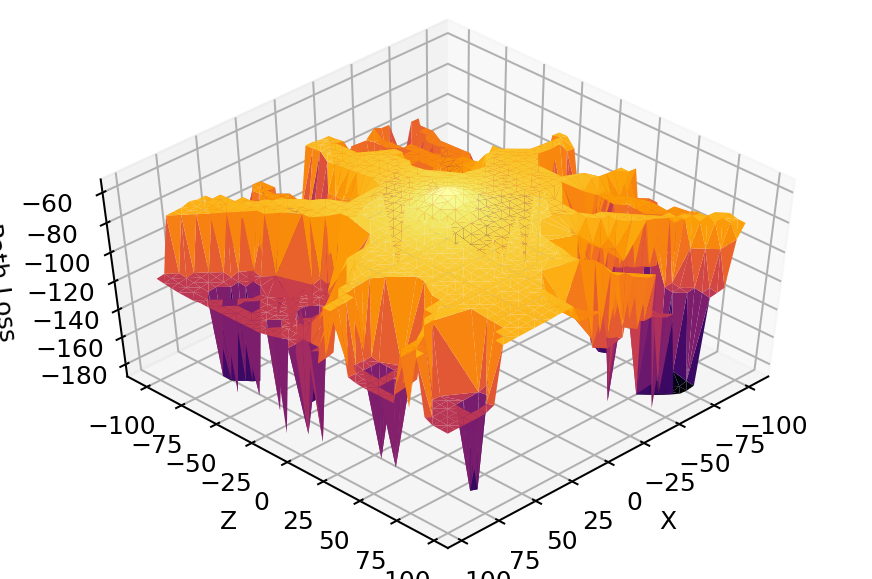

In [38]:
# Display the map
plt.rcParams['figure.dpi'] = 180
ax = plt.axes(projection='3d')
ax.plot_trisurf(x_list, z_list, pl_list, cmap="inferno", near)
ax.set_zlabel('Path Loss')
ax.view_init(50, 45)
plt.xlabel('X')
plt.ylabel('Z')
plt.show()

In [32]:
example_env.disconnect()